# Dependencies

In [1]:
# library importsm
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [ ]:
# extra library imports
import missingno as msno

# Data Cleaning

In [2]:
# import csv
mush_path = 'Resources/Raw/secondary_data.csv'
mush_metadata = pd.read_csv(mush_path, sep=';')
mush_metadata.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
drop = mush_metadata.dropna()
drop

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season


In [5]:
mush_metadata.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

<AxesSubplot:>

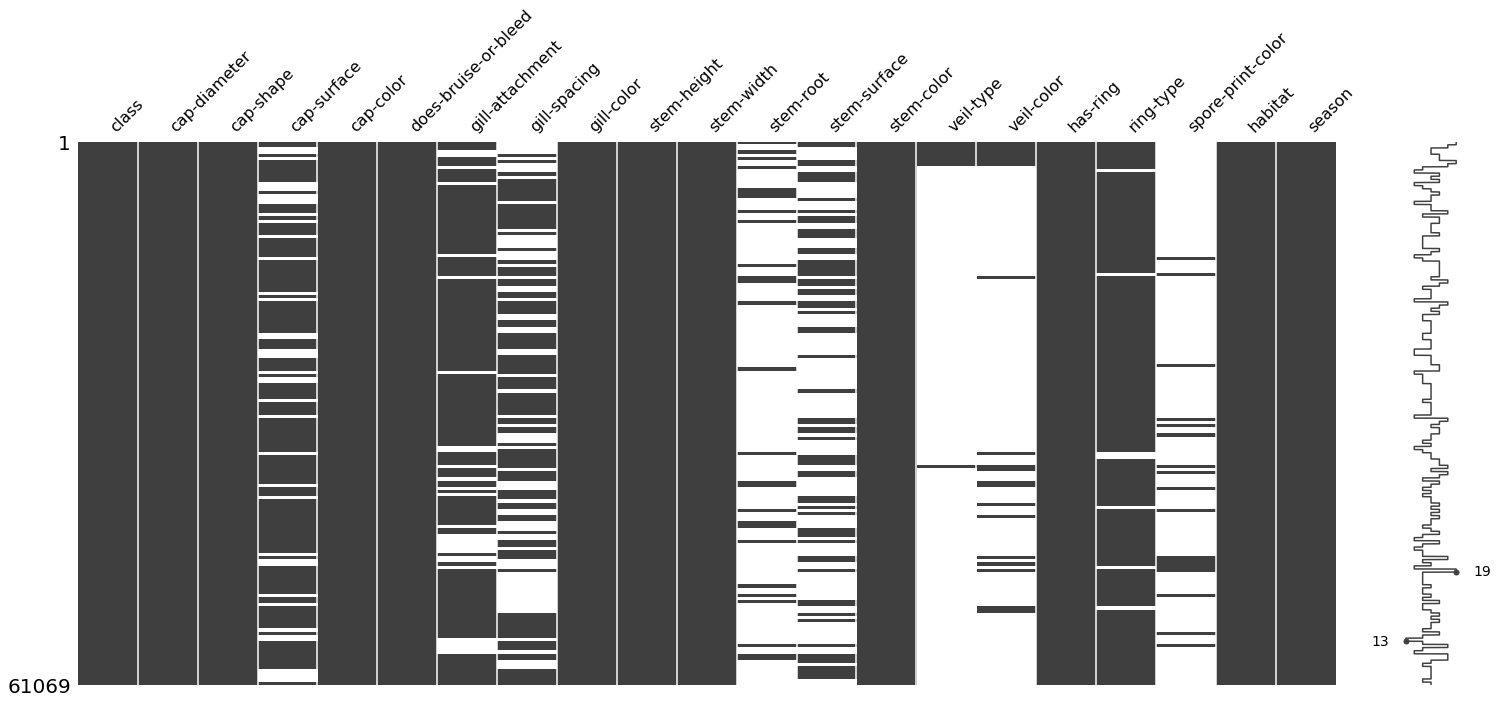

In [7]:
msno.matrix(mush_metadata)
# black have value coulumn integer string or anything
# white is nan

<AxesSubplot:>

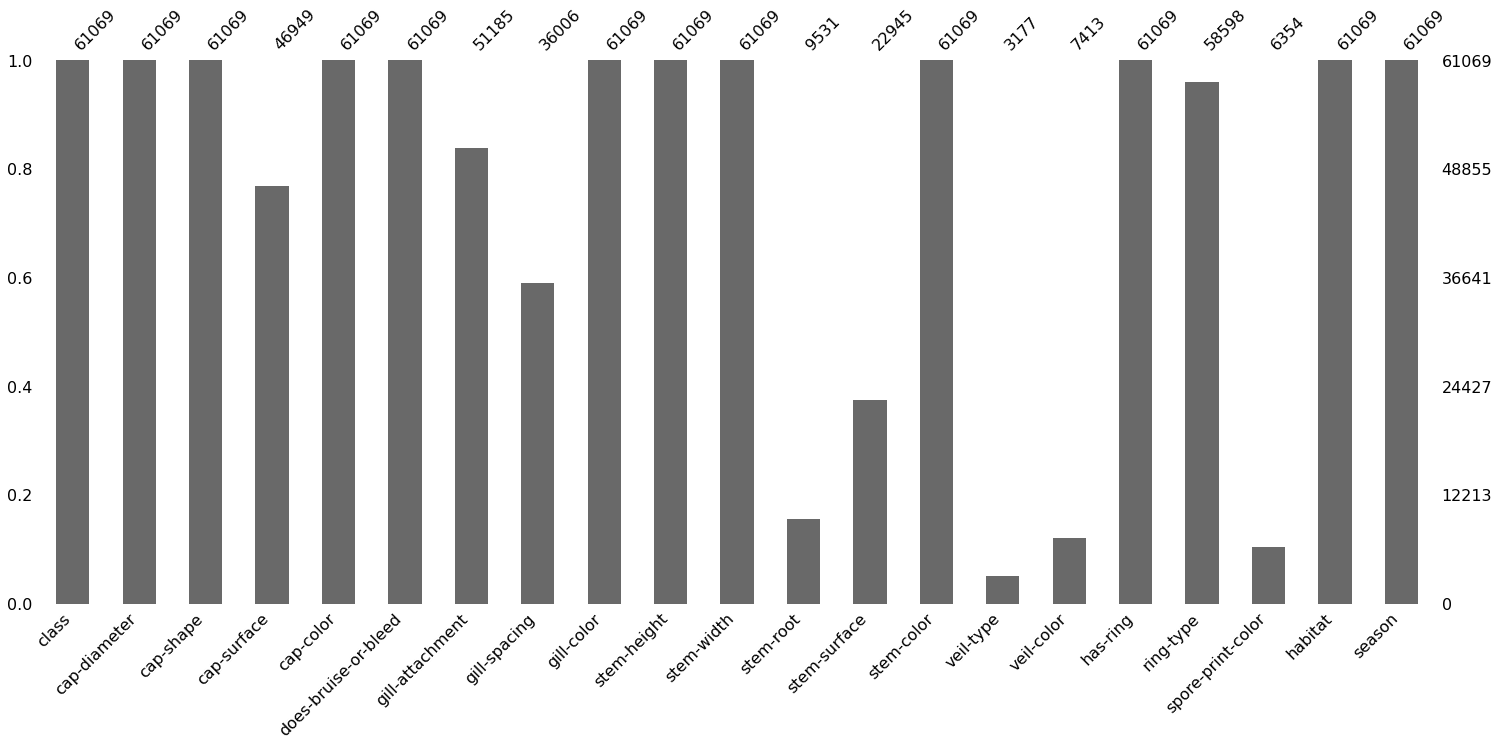

In [8]:
msno.bar(mush_metadata)

In [9]:
mush_metadata.info()
# Object is string & float is decimal value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

Text(0.5, 1.0, 'Poisonous v/s Edible')

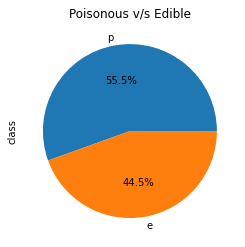

In [10]:
ax=mush_metadata["class"].value_counts().plot(kind='pie',autopct= "%1.1f%%")
# p is poisonus and e is edible-binary 
ax.set_title("Poisonous v/s Edible")

In [11]:
mush_group=mush_metadata.groupby("class")
# grouping poisonus and edibles
mush_group.groups

{'e': [1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, ...], 'p': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,

In [12]:
mush_p_df=mush_metadata.loc[mush_metadata['class']=='p']
mush_p_df
#creating Df for poisonous

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [23]:
index1=mush_p_df['cap-color'].unique().tolist()
index2=mush_p_df['gill-color'].unique().tolist()
index3=mush_p_df['stem-color'].unique().tolist()
pd.DataFrame({"cap color":index1,"gill color":index2,"stem color":index3}).plot(kind="bar",stacked=True)

TypeError: no numeric data to plot

In [19]:
pd.pivot_table(mush_metadata,index="class",columns=["cap-color","gill-color","stem-color"],aggfunc=np.mean)

cap-diameter                                                    \
cap-color             b                                                     
gill-color            b         o         u         w                   y   
stem-color            w         w         w         n         w         n   
class                                                                       
e              9.261119  6.443647  2.477802  5.938971  5.177447       NaN   
p                   NaN       NaN       NaN  3.626042  3.980000  3.487429   

                                                     ... stem-width            \
cap-color                     e                      ...          y             
gill-color                    b                   e  ...          w             
stem-color          w         e         n         e  ...          w         y   
class                                                ...                        
e           12.078571       NaN       NaN  3.282581  ...  15.823766  5.481215   
p                 NaN  5.598125  5.517742  3.455637  ...   6.581264  3.498191   

                                                                            \
cap-color                                                                    
gill-color          y                                                        
stem-color          e          k          n         o         r          u   
class                                                                        
e           12.585556  34.674709  35.555549       NaN       NaN        NaN   
p           16.829302        NaN  12.657227  9.161822  6.180606  18.506389   

                                  
cap-color                         
gill-color                        
stem-color          w          y  
class                             
e           12.952202  14.802158  
p            8.395157  10.792500  

[2 rows x 1083 columns]

<AxesSubplot:>

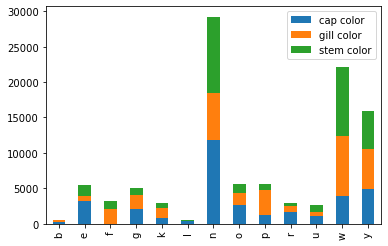

In [36]:
index1=mush_p_df['cap-color'].value_counts()
index2=mush_p_df['gill-color'].value_counts()
index3=mush_p_df['stem-color'].value_counts()
p_stack=pd.DataFrame({"cap color":index1,"gill color":index2,"stem color":index3})
p_stack.plot(kind="bar",stacked=True)

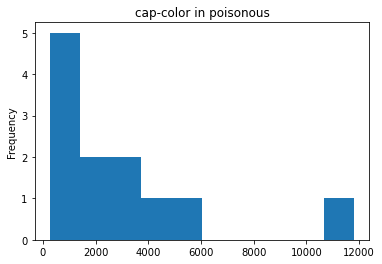

In [24]:
p_cap_color= mush_p_df["cap-color"].value_counts()
cap_pie=p_cap_color.plot(kind='hist', y='cap-color', title='cap-color in poisonous',stacked=True)
plt.show()

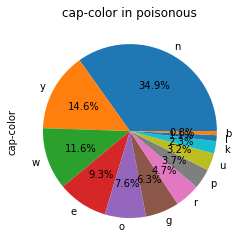

In [25]:
p_cap_color= mush_p_df["cap-color"].value_counts()
cap_pie=p_cap_color.plot(kind='pie', y='cap-color', title='cap-color in poisonous',autopct= "%1.1f%%")
plt.show()

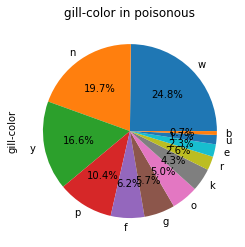

In [26]:
p_cap_color= mush_p_df["gill-color"].value_counts()
gil_pie=p_cap_color.plot(kind='pie', y='gil-color', title='gill-color in poisonous',autopct= "%1.1f%%")
plt.show()

In [ ]:
p_cap_color= mush_p_df["stem-color"].value_counts()
cap_pie=p_cap_color.plot(kind='pie', y='stem-color', title='stem-color in poisonous',autopct= "%1.1f%%")
plt.show()

In [27]:
mush_e_df=mush_metadata.loc[mush_metadata['class']=='e']
mush_e_df
#creating Df for edible

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
1059,e,10.42,f,NaN,n,t,NaN,NaN,w,11.50,...,b,NaN,w,u,w,t,g,NaN,d,a
1060,e,9.59,f,NaN,n,t,NaN,NaN,w,9.87,...,b,NaN,w,u,w,t,g,NaN,d,u
1061,e,9.10,f,NaN,n,t,NaN,NaN,w,11.45,...,b,NaN,w,u,w,t,g,NaN,d,a
1062,e,8.86,x,NaN,n,t,NaN,NaN,w,11.25,...,b,NaN,w,u,w,t,g,NaN,d,u
1063,e,9.59,x,NaN,n,t,NaN,NaN,w,7.82,...,b,NaN,w,u,w,t,g,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60711,e,4.67,o,NaN,n,f,f,f,f,4.69,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
60712,e,7.28,c,NaN,n,f,f,f,f,5.29,...,NaN,NaN,n,NaN,NaN,f,f,NaN,l,s
60713,e,6.60,p,NaN,n,f,f,f,f,5.52,...,NaN,NaN,n,NaN,NaN,f,f,NaN,l,s
60714,e,4.19,c,NaN,n,f,f,f,f,4.22,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s


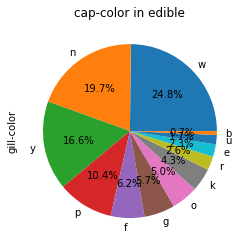

In [28]:
e_cap_color= mush_e_df["cap-color"].value_counts()
p_pie=p_cap_color.plot(kind='pie', y='cap-color', title='cap-color in edible',autopct= "%1.1f%%")
plt.show()

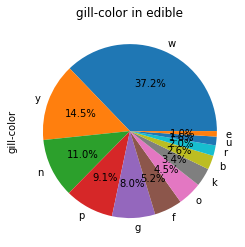

In [29]:
e_cap_color= mush_e_df["gill-color"].value_counts()
e_pie=e_cap_color.plot(kind='pie', y='gill-color', title='gill-color in edible',autopct= "%1.1f%%")
plt.show()

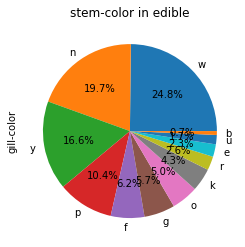

In [30]:
e_cap_color= mush_e_df["stem-color"].value_counts()
p_pie=p_cap_color.plot(kind='pie', y='stem-color', title='stem-color in edible',autopct= "%1.1f%%")
plt.show()

<AxesSubplot:>

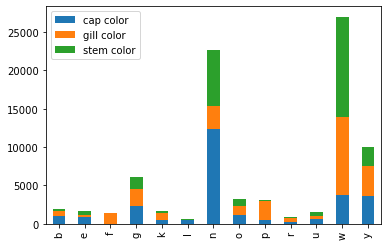

In [37]:
index1=mush_e_df['cap-color'].value_counts()
index2=mush_e_df['gill-color'].value_counts()
index3=mush_e_df['stem-color'].value_counts()
e_stack=pd.DataFrame({"cap color":index1,"gill color":index2,"stem color":index3})
e_stack.plot(kind="bar",stacked=True)

<AxesSubplot:>

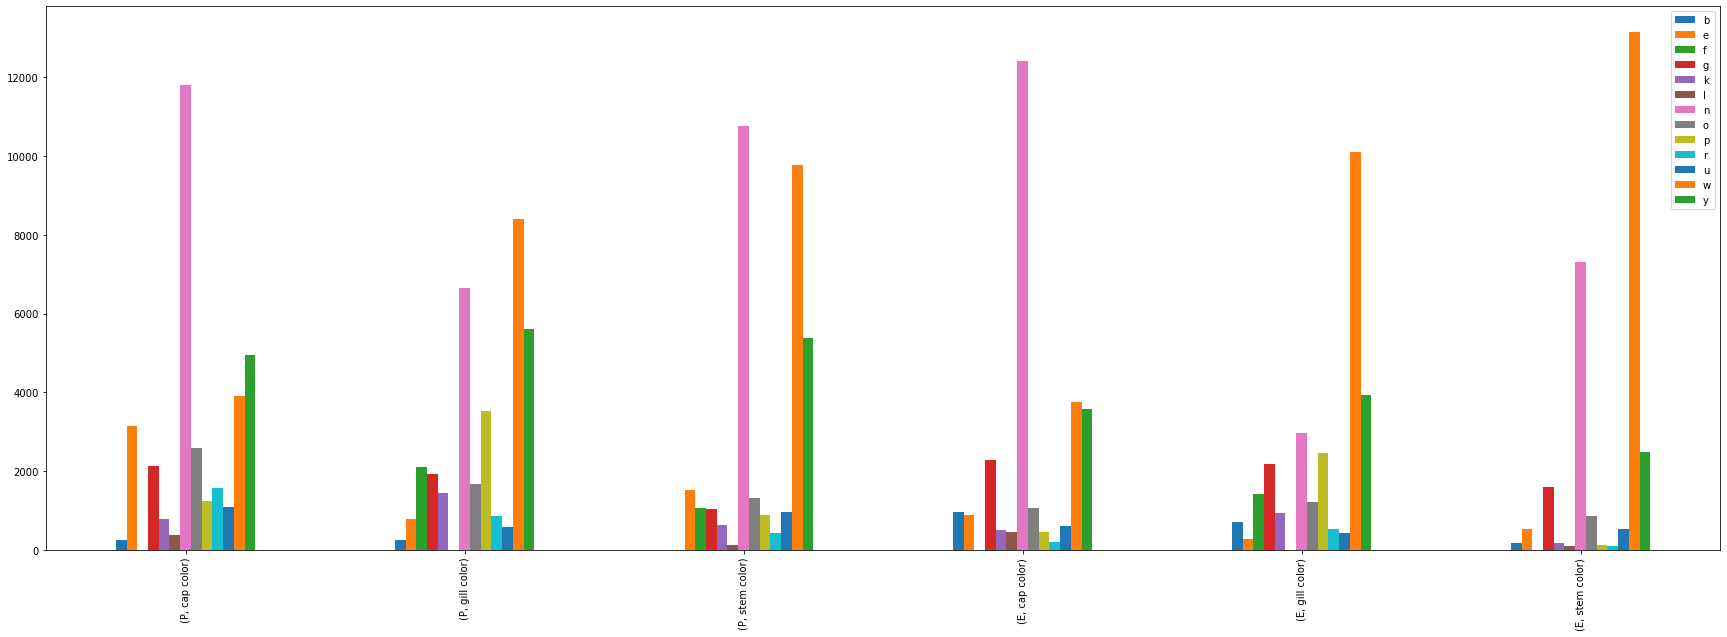

In [68]:
pd.concat({"P":p_stack.T,"E":e_stack.T}).plot(kind="bar",figsize=(30,10))

<AxesSubplot:>

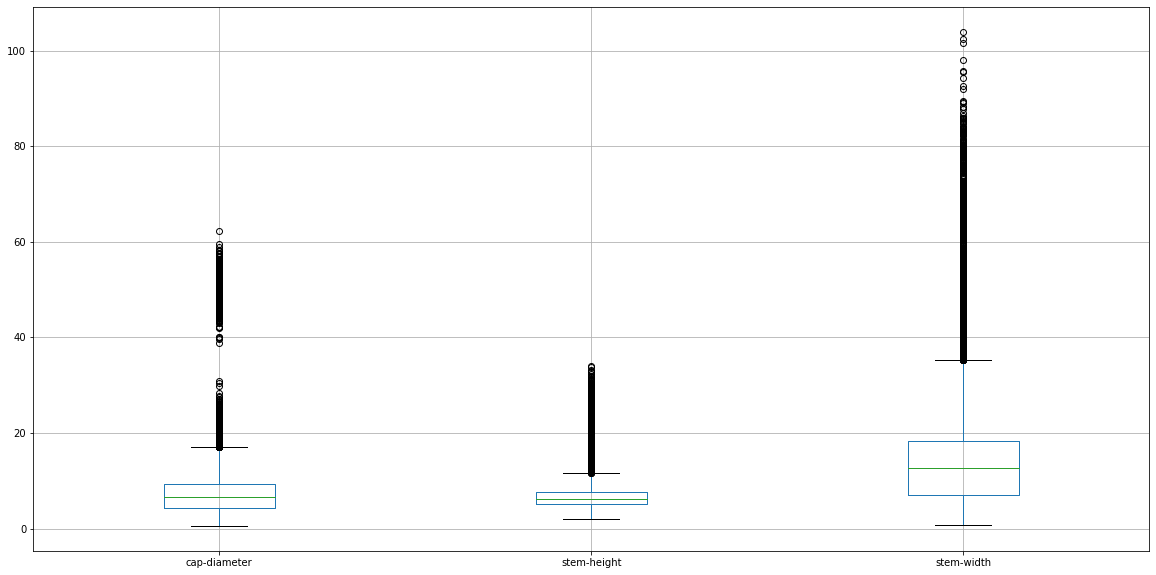

In [66]:
mush_e_df.boxplot(column =["cap-diameter","stem-height","stem-width"],figsize=(20,10))
#mush_e_df["cap-surface"].value_counts()

<AxesSubplot:>

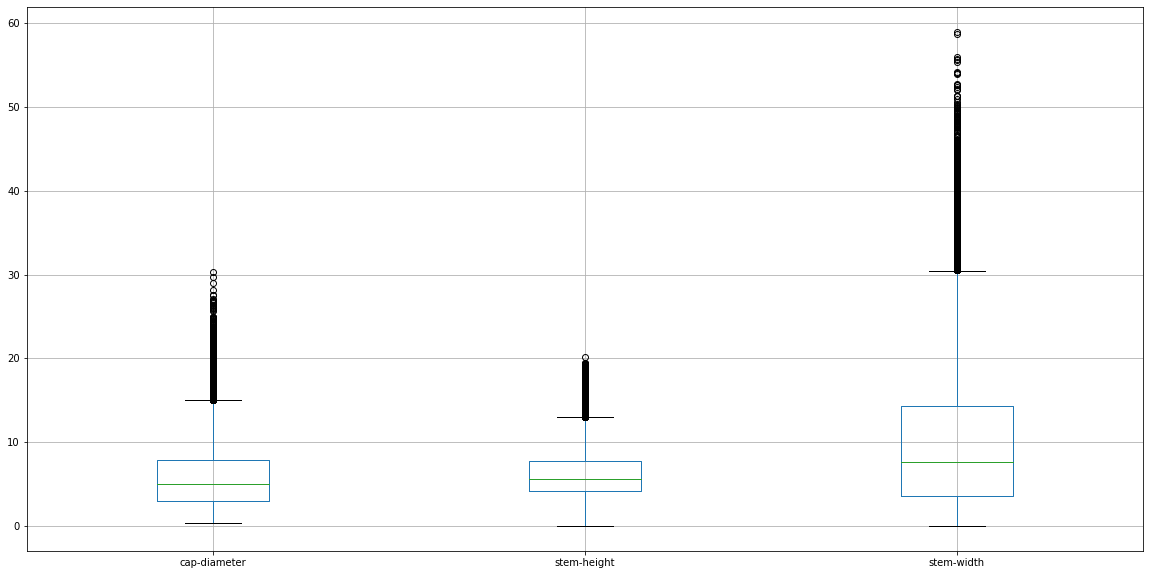

In [67]:
mush_p_df.boxplot(column =["cap-diameter","stem-height","stem-width"],figsize=(20,10))
#mush_e_df["cap-surface"].value_counts()

In [ ]:
# outliers are higher e vs p
# median is is higher in e vs p
# inner quartile is bigger in p vs e

In [63]:
mush_e_df.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [ ]:
mush_group ["cap-diameter"].mean()
# edible has a bigger cap diameter on average

In [ ]:
mush_group ["cap-diameter"].median()
# edible has a bigger cap diameter on median too!

In [ ]:
mush_group ["stem-height"].mean()

In [ ]:
mush_group ["stem-height"].median()

In [ ]:
mush_group ["stem-width"].mean()

In [ ]:
mush_group ["stem-width"].median()

In [ ]:
mush_corr = mush_metadata.corr()
mush_corr

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(mush_corr, annot=True)

In [ ]:
# for machine learning u shouldnt take the one which are high correlated because it tends to 
#confuse machine learning algorithm but in our instance we have .69


In [ ]:
# trying to see if class_encoded has any cor relation individually with others. bsacially no correlation.
# During machine learning it can still find them 
mush_metadata["class_encoded"] = mush_metadata["class"].map(lambda x: 1 if x == 'e' else 0)
y_corr = mush_metadata.corr()
sn.heatmap(y_corr, annot=True)